In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Caricamento e gestione del dataset sulla fertilità
fertility_ds = pd.read_csv('C:\\Users\\paioc\\PycharmProjects\\SciVis_Project\\resources\\fertility_rate.csv')

fertility_ds = fertility_ds.filter(items=['Country or Area', 'Year(s)', 'Value'])
fertility_ds = fertility_ds[fertility_ds['Year(s)'] >= 1999]
fertility_ds

,Country or Area,Year(s),Value
0,ADB region: Central and West Asia,2023,3.5252
1,ADB region: Central and West Asia,2020,3.6272
2,ADB region: Central and West Asia,2017,3.6671
3,ADB region: Central and West Asia,2014,3.7965
4,ADB region: Central and West Asia,2011,3.9217
...,...,...,...
6098,Zimbabwe,2011,4.1264
6099,Zimbabwe,2008,3.7826
6100,Zimbabwe,2005,3.6933
6101,Zimbabwe,2002,3.9249


In [8]:
fertility_ds_continents = fertility_ds[(fertility_ds['Country or Area'] == 'Asia') | (fertility_ds['Country or Area'] == 'Africa') | (fertility_ds['Country or Area'] == 'Europe') | (fertility_ds['Country or Area'] == 'Northern America') | (fertility_ds['Country or Area'] == 'South America') | (fertility_ds['Country or Area'] == 'Oceania')]
fertility_ds_continents

,Country or Area,Year(s),Value
77,Africa,2023,4.0718
78,Africa,2020,4.2423
79,Africa,2017,4.4822
80,Africa,2014,4.6862
81,Africa,2011,4.8417
82,Africa,2008,4.9677
83,Africa,2005,5.0400
84,Africa,2002,5.1147
85,Africa,1999,5.2480
308,Asia,2023,1.8809


In [9]:
fertility_ds_continents['Country or Area'].unique()

array(['Africa', 'Asia', 'Europe', 'Northern America', 'Oceania',
       'South America'], dtype=object)

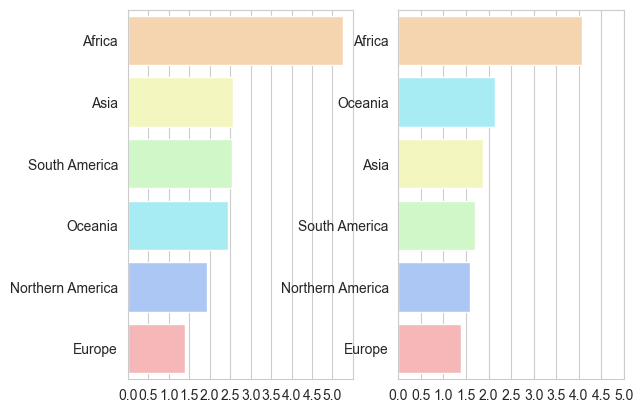

In [53]:
sns.set_style('whitegrid')
pers_palette = {'Europe': '#FFADAD', 'Africa': '#FFD6A5', 'Asia': '#FDFFB6', 'Oceania': '#9BF6FF', 'Northern America':'#A0C4FF', 'South America': '#CAFFBF'}
f, axes = plt.subplots(1, 2)
ax1 = sns.barplot(
    data=fertility_ds_continents[fertility_ds_continents['Year(s)'] == 1999].sort_values(['Value'],
    ascending=False).reset_index(drop=True),
    x='Value',
    y='Country or Area',
    orient='y',
    hue='Country or Area',
    palette=pers_palette,
    ax=axes[0]
)
ax1.set_xticks(np.arange(0, 5.01, .5))
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2 = sns.barplot(
    data=fertility_ds_continents[fertility_ds_continents['Year(s)'] == 2023].sort_values(['Value'],
    ascending=False).reset_index(drop=True),
    x='Value',
    y='Country or Area',
    orient='y',
    hue='Country or Area',
    palette=pers_palette,
    ax=axes[1]
)
ax2.set_xticks(np.arange(0, 5.01, .5))
ax2.set(xlabel=None)
ax2.set(ylabel=None)
plt.show()

In [11]:
# Salario medio annuo (espresso in dollari)
annual_salary = pd.read_csv('C:\\Users\\paioc\\PycharmProjects\\SciVis_Project\\resources\\annual_salary.csv')
annual_salary = annual_salary.filter(items=['ref_area.label', 'time', 'obs_value'])
annual_salary = annual_salary.rename(columns={'ref_area.label': 'Country or Area', 'time': 'Year(s)', 'obs_value': 'Value'})
annual_salary = annual_salary[annual_salary['Year(s)'] % 3 == 1]
annual_salary

,Country or Area,Year(s),Value
0,Switzerland,2023,6798.847
3,Switzerland,2020,6863.720
6,Switzerland,2017,6564.307
9,Switzerland,2014,7619.795
12,Switzerland,2011,7841.727
...,...,...,...
228,United States of America,2011,3433.603
231,United States of America,2008,3339.885
234,United States of America,2005,3029.409
237,United States of America,2002,2806.444


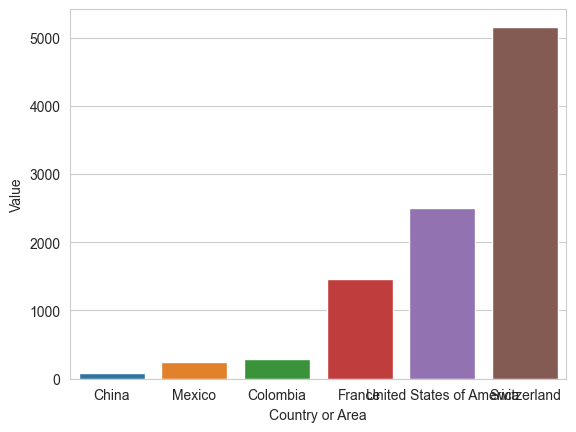

In [12]:
sns.barplot(data=annual_salary[annual_salary['Year(s)'] == 1999].sort_values(by="Value", ), x='Country or Area', y='Value', hue='Country or Area')
plt.show()

In [13]:
# Disoccupazione in Italia
disoccupazione_italia = pd.read_csv('C:\\Users\\paioc\\PycharmProjects\\SciVis_Project\\resources\\disoccupazione_italia.csv')
disoccupazione_italia = disoccupazione_italia[disoccupazione_italia['Territorio'] == 'Italia']
disoccupazione_italia = disoccupazione_italia[disoccupazione_italia['Classe di età'] == '15-74 anni']
disoccupazione_italia = disoccupazione_italia[disoccupazione_italia['TIME'] == disoccupazione_italia['Seleziona periodo']]
disoccupazione_italia = disoccupazione_italia.filter(items=['TIME', 'Value'])
disoccupazione_italia = disoccupazione_italia.astype({'TIME': 'int32'})
disoccupazione_italia

,TIME,Value
2820,2005,1886.315
2825,2006,1664.018
2830,2007,1488.661
2835,2008,1671.130
2840,2009,1921.202
2845,2010,2078.104
2850,2011,2086.380
2855,2012,2718.538
2860,2013,3078.091
2865,2014,3222.661


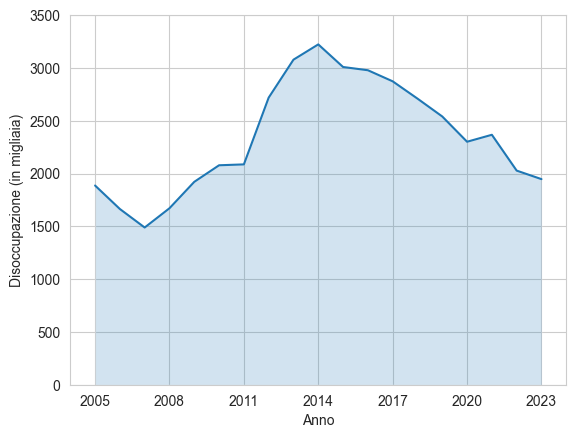

In [14]:
fig, ax = plt.subplots()
sns.lineplot(data=disoccupazione_italia, x='TIME', y='Value')
ax.set_xlabel('Anno')
ax.set_xlim(2004, 2024)
ax.set_ylabel('Disoccupazione (in migliaia)')
ax.set_ylim(0, 3500)
plt.xticks([2005, 2008, 2011, 2014, 2017, 2020, 2023])
ax.fill_between(disoccupazione_italia['TIME'], disoccupazione_italia['Value'], alpha=0.2)
plt.show()